FROM: https://towardsdatascience.com/become-a-pok%C3%A9mon-master-with-machine-learning-f61686542ef1

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import classification_report

In [2]:
# Load the datasets

pokemon = pd.read_csv("pokemon.csv")  # Pokemon Dataset
combats = pd.read_csv("combats.csv")  # Combats Dataset

In [3]:
poke_temp = pokemon[["#","Name"]]
A = pd.merge(combats, poke_temp, left_on="First_pokemon", right_on="#", how="left")
A.rename(columns={'Name': 'First_pokemon_name'}, inplace=True)
A

B = pd.merge(combats, poke_temp, left_on="Second_pokemon", right_on="#", how="left")
B.rename(columns={'Name': 'Second_pokemon_name'}, inplace=True)
B

poke_final = A.join(B[["Second_pokemon_name"]])
poke_final.drop('#', axis=1, inplace=True)
poke_final

,First_pokemon,Second_pokemon,Winner,First_pokemon_name,Second_pokemon_name
0,266,298,298,Larvitar,Nuzleaf
1,702,701,701,Virizion,Terrakion
2,191,668,668,Togetic,Beheeyem
3,237,683,683,Slugma,Druddigon
4,151,231,151,Omastar,Shuckle
...,...,...,...,...,...
49995,707,126,707,Reshiram,Horsea
49996,589,664,589,Drilbur,Tynamo
49997,303,368,368,Pelipper,Zangoose
49998,109,89,109,Voltorb,Magnemite


# Data Exploration

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [6]:
print(pokemon.nunique())

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64


Text(0, 0.5, 'Frequency')

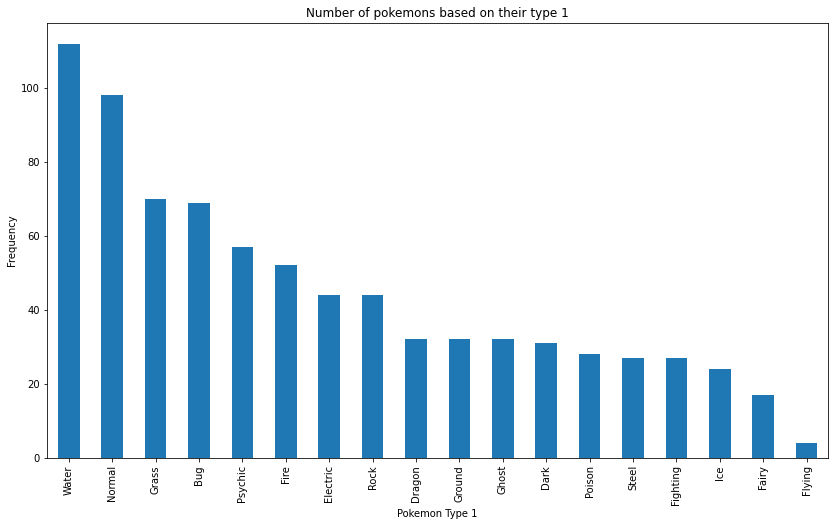

In [7]:
# Plot the number of pokemon present in each category of "type 1"
ax = pokemon['Type 1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 1")
ax.set_xlabel("Pokemon Type 1")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

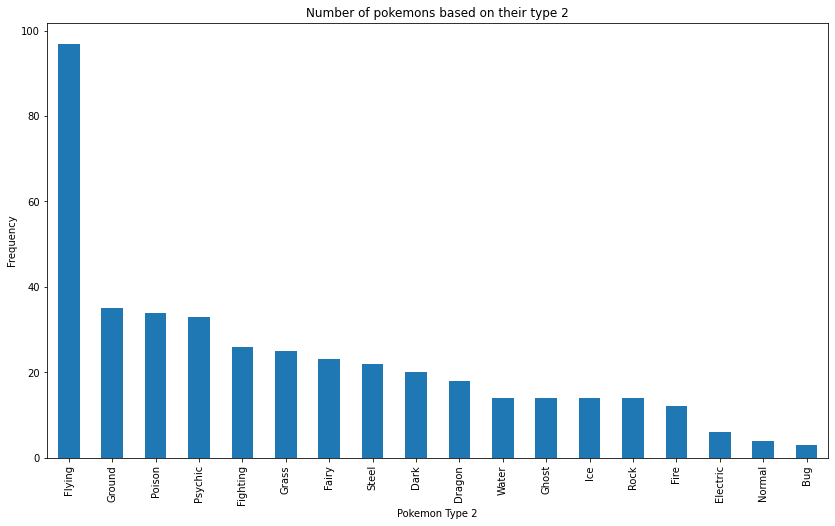

In [8]:
ax = pokemon['Type 2'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 2")
ax.set_xlabel("Pokemon Type 2")
ax.set_ylabel("Frequency")

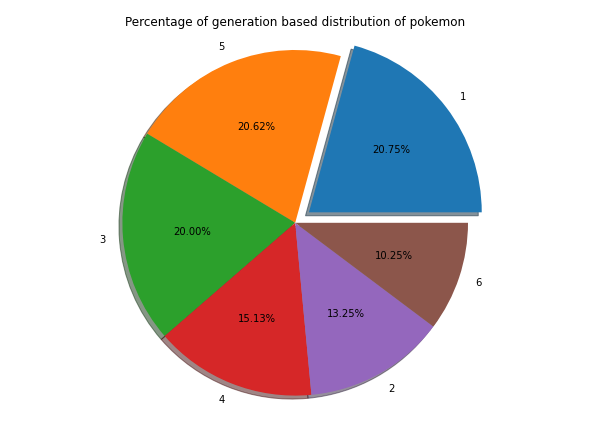

In [9]:
generation =  dict(pokemon['Generation'].value_counts())
gen_counts = generation.values() # No of pokemon in each generation
gen = generation.keys()  # Type of generation

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of generation based distribution of pokemon")
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
ax.axis('equal')


plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()

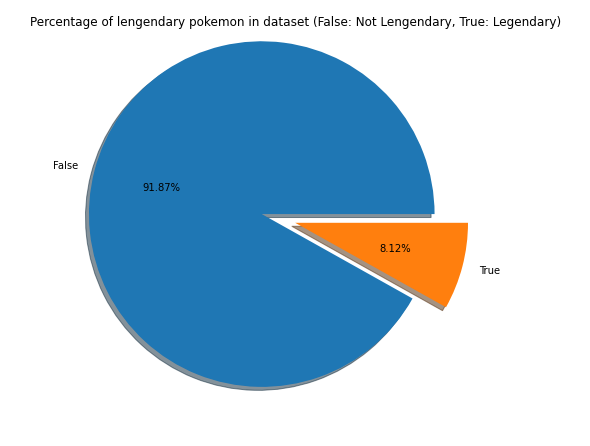

In [10]:
generation =  dict(pokemon['Legendary'].value_counts())
gen_counts = generation.values() 
gen = generation.keys()

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of lengendary pokemon in dataset (False: Not Lengendary, True: Legendary)")
ax = fig.add_axes([0,0,1,1])
explode = (0.2, 0)  # explode 1st slice
ax.axis('equal')


plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()

# Data Preprocessing

In [11]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("NA")

In [12]:
# Convert "Legendary" column, False is converted to 0 and True is converted to 1.
pokemon["Legendary"] = pokemon["Legendary"].astype(int)

In [13]:
h1 = FeatureHasher(n_features=5, input_type='string')
h2 = FeatureHasher(n_features=5, input_type='string')
d1 = h1.fit_transform(pokemon["Type 1"])
d2 = h2.fit_transform(pokemon["Type 2"])

In [27]:
d1.head()
d2.head()

,0,1,2,3,4
0,0.0,-2.0,0.0,2.0,-2.0
1,0.0,-2.0,0.0,2.0,-2.0
2,0.0,-2.0,0.0,2.0,-2.0
3,0.0,-2.0,0.0,2.0,-2.0
4,0.0,0.0,0.0,0.0,0.0


In [14]:
# Convert to dataframe
d1 = pd.DataFrame(data=d1.toarray())
d2 = pd.DataFrame(data=d2.toarray())

# Drop Type 1 and Type 2 column from Pokemon dataset and concatenate the above two dataframes.
pokemon = pokemon.drop(columns = ["Type 1", "Type 2"])
pokemon = pd.concat([pokemon, d1, d2], axis=1)

In [15]:
pokemon

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,0,1,2,3,4,0,1,2,3,4
0,1,Bulbasaur,45,49,49,65,65,45,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
1,2,Ivysaur,60,62,63,80,80,60,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
2,3,Venusaur,80,82,83,100,100,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
3,4,Mega Venusaur,80,100,123,122,120,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
4,5,Charmander,39,52,43,60,50,65,1,0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
796,797,Mega Diancie,50,160,110,160,110,110,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
797,798,Hoopa Confined,80,110,60,150,130,70,6,1,-1.0,-2.0,-2.0,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,1,-1.0,-2.0,-2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [25]:
#pokemon.loc[pokemon["#"]==266].values
pokemon.loc[pokemon["#"]==1].values

array([[1, 'Bulbasaur', 45, 49, 49, 65, 65, 45, 1, 0, 2.0, 0.0, 0.0, 0.0,
        -1.0, 0.0, -2.0, 0.0, 2.0, -2.0]], dtype=object)

In [17]:
x = pokemon.loc[pokemon["#"]==266].values[:, 2:][0]
print(x)
y = pokemon.loc[pokemon["#"]==298].values[:, 2:][0]
print(y)
z = np.concatenate((x,y))
z

[50 64 50 45 50 41 2 0 0.0 -1.0 -1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0]
[70 70 40 60 40 60 3 0 2.0 0.0 0.0 0.0 -1.0 2.0 0.0 0.0 0.0 0.0]


array([50, 64, 50, 45, 50, 41, 2, 0, 0.0, -1.0, -1.0, 1.0, 1.0, 1.0, 0.0,
       1.0, 1.0, 1.0, 70, 70, 40, 60, 40, 60, 3, 0, 2.0, 0.0, 0.0, 0.0,
       -1.0, 2.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [56]:
data = []
i = 0
for t in combats.itertuples():
    i += 1
    if i % 1000 == 0:
      print(i)
    first_pokemon = t[1]
    second_pokemon = t[2]
    winner = t[3]
    
    x = pokemon.loc[pokemon["#"]==first_pokemon].values[:, 2:][0]
    y = pokemon.loc[pokemon["#"]==second_pokemon].values[:, 2:][0]
    diff = (x-y)[:6]
    z = np.concatenate((x,y))
    
    if winner == first_pokemon:
        z = np.append(z, [0])
    else:
        z = np.append(z, [1])
        
    data.append(z)

First z: [50 64 50 45 50 41 2 0 0.0 -1.0 -1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 70 70 40
 60 40 60 3 0 2.0 0.0 0.0 0.0 -1.0 2.0 0.0 0.0 0.0 0.0]
2 z: [50 64 50 45 50 41 2 0 0.0 -1.0 -1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 70 70 40
 60 40 60 3 0 2.0 0.0 0.0 0.0 -1.0 2.0 0.0 0.0 0.0 0.0 1]
First z: [55 40 85 80 105 40 2 0 2.0 -1.0 0.0 -1.0 1.0 0.0 -1.0 0.0 -1.0 0.0 75 75
 75 125 95 40 5 0 -1.0 -2.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
2 z: [55 40 85 80 105 40 2 0 2.0 -1.0 0.0 -1.0 1.0 0.0 -1.0 0.0 -1.0 0.0 75 75
 75 125 95 40 5 0 -1.0 -2.0 -2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1]
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


In [57]:
data = np.asarray(data)

In [58]:
data[0]

array([50, 64, 50, 45, 50, 41, 2, 0, 0.0, -1.0, -1.0, 1.0, 1.0, 1.0, 0.0,
       1.0, 1.0, 1.0, 70, 70, 40, 60, 40, 60, 3, 0, 2.0, 0.0, 0.0, 0.0,
       -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1], dtype=object)

In [59]:
X = data[:, :-1].astype(int)
y = data[:, -1].astype(int)

In [62]:
print(X[0])
print(y[0])

[50 64 50 45 50 41  2  0  0 -1 -1  1  1  1  0  1  1  1 70 70 40 60 40 60
  3  0  2  0  0  0 -1  2  0  0  0  0]

1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(X_train,y_train)
pred = model.predict(X_test)
print('Accuracy of {}:'.format("model"), accuracy_score(pred, y_test))

Accuracy of model: 0.9468


In [23]:
print(pred)
print(y_test)

[1 0 0 ... 1 1 1]
[1 0 0 ... 1 1 1]


In [24]:
print('Accuracy :', accuracy_score(pred, y_test))
print(classification_report(y_test, pred))

Accuracy : 0.9468
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5941
           1       0.95      0.95      0.95      6559

    accuracy                           0.95     12500
   macro avg       0.95      0.95      0.95     12500
weighted avg       0.95      0.95      0.95     12500



In [109]:
# Predict winner (first pokemon vs second pokemon)
def predict_winner(first_poke, sec_poke):
  x = pokemon.loc[pokemon["#"]==first_poke].values[:, 2:][0]
  y = pokemon.loc[pokemon["#"]==sec_poke].values[:, 2:][0]
  first_name = pokemon.loc[pokemon["#"]==first_poke]["Name"] 
  sec_name = pokemon.loc[pokemon["#"]==sec_poke]["Name"] 
  print(f"{first_name.values[0]} vs. {sec_name.values[0]}")
  z = np.concatenate((x,y))
  z = np.asarray(z).astype(int)
  #print(f"z: {z}")
  poke_winner = model.predict([z])
  if poke_winner == 0:
    print(f"Predicted winner: {first_name}")
  else:
    print(f"Predicted winner: {sec_name}")

#predict_winner(1, 426)
predict_winner(1, 5)

Bulbasaur vs. Charmander
Predicted winner: 4    Charmander
Name: Name, dtype: object


In [107]:
#pokemon.loc[pokemon["Name"]=="Rayquaza"]["#"].values[0]
pokemon.loc[pokemon["Name"]=="Charmander"]["#"].values[0]

5

In [93]:
pokemon.head()
#pokemon.tail()

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,0,1,2,3,4,0,1,2,3,4
795,796,Diancie,50,100,150,100,150,50,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
796,797,Mega Diancie,50,160,110,160,110,110,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
797,798,Hoopa Confined,80,110,60,150,130,70,6,1,-1.0,-2.0,-2.0,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,1,-1.0,-2.0,-2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
799,800,Volcanion,80,110,120,130,90,70,6,1,1.0,-1.0,0.0,-1.0,1.0,2.0,0.0,0.0,0.0,-1.0
